# EDA - WR Analysis

---
## Imports

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rs = np.random.RandomState(8)
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None  # default='warn'

## Introduction
Data analysis on the WR position to find relation between data and Pro Bowls

## Loading Data
All data was pulled from the github project 

In [2]:
df = pd.read_csv("C:/Users/matth/Documents/GitHub/NFL_Success/final_df.csv")
positions = ['TE', 'QB']
df = df[~df.Pos.isin(positions)]
df.drop('Rnd', axis=1, inplace=True)
df.to_csv('my_analysis.csv')
full_df = pd.read_csv('my_analysis.csv')
wr_df = full_df[full_df['Pos'] == 'WR']
fr_df = full_df[full_df['Pos'] != 'WR']

In [3]:
wr_df[0:5]

,Unnamed: 0,Unnamed: 0.1,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,...,PassTD,Int,RushAtt,RushYds,RushTD,RecRec,RecYds,RecTD,Ht Ft,Ht In
0,0,0,J.J. Arcega-Whiteside,WR,Stanford,225,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,169.0,1.0,6,2
2,2,2,Miles Boykin,WR,Notre Dame,220,4.42,43.5,12.0,140.0,...,NaN,NaN,NaN,NaN,NaN,13.0,198.0,3.0,6,4
3,3,3,A.J. Brown,WR,Mississippi,226,4.49,36.5,19.0,120.0,...,NaN,NaN,3.0,60.0,1.0,52.0,1051.0,8.0,6,0
4,4,4,Marquise Brown,WR,Oklahoma,166,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.0,584.0,7.0,5,9
5,5,5,Parris Campbell,WR,Ohio State,205,4.31,40.0,11.0,135.0,...,NaN,NaN,4.0,34.0,0.0,18.0,127.0,1.0,6,0


In [4]:
fr_df[0:5]

,Unnamed: 0,Unnamed: 0.1,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,...,PassTD,Int,RushAtt,RushYds,RushTD,RecRec,RecYds,RecTD,Ht Ft,Ht In
1,1,1,Ryquell Armstead,RB,Temple,220,4.45,30.0,22.0,114.0,...,NaN,NaN,35.0,108.0,0.0,14.0,144.0,2.0,5,11
7,9,9,Myles Gaskin,RB,Washington,205,4.58,35.5,24.0,118.0,...,NaN,NaN,36.0,133.0,1.0,7.0,51.0,0.0,5,9
10,14,14,Damien Harris,RB,Alabama,216,4.57,37.0,16.0,121.0,...,NaN,NaN,4.0,12.0,0.0,NaN,NaN,NaN,5,10
12,17,17,Darrell Henderson,RB,Memphis,208,4.49,33.5,22.0,121.0,...,NaN,NaN,39.0,147.0,0.0,4.0,37.0,0.0,5,8
13,18,18,Justice Hill,RB,Oklahoma State,198,4.40,40.0,21.0,130.0,...,NaN,NaN,58.0,225.0,2.0,8.0,70.0,0.0,5,10


## WR Analysis
---

### Heat Map for College Stats

Text(0.5, 1.0, 'Heat map for College Stats')

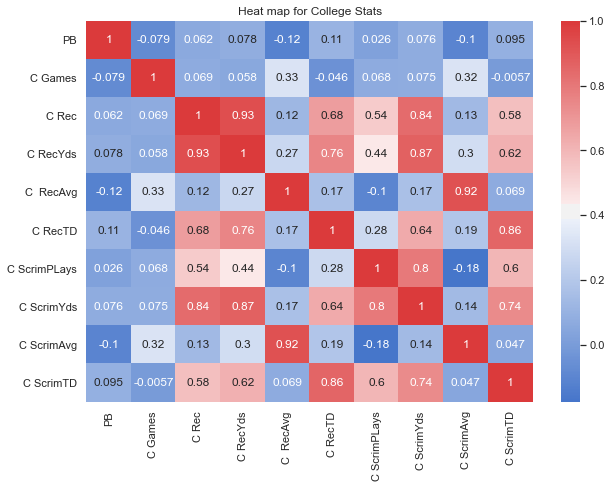

In [96]:
hm = wr_df[['PB','C Games','C Rec', 'C RecYds', 'C  RecAvg', 'C RecTD', 'C ScrimPLays', 'C ScrimYds','C ScrimAvg',
            'C ScrimTD']]
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(255, 12, as_cmap=True)
g = sns.heatmap(hm.corr(), annot=True, cmap=cmap)
g.set_title('Heat map for College Stats')

### Heat Map for Combine Stats

Text(0.5, 1.0, 'Heat map for Combine Stats')

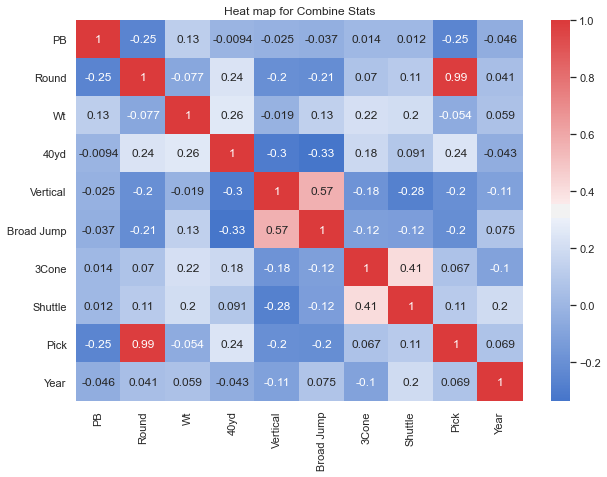

In [95]:
hm = wr_df[['PB','Round','Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle','Pick', 'Year']]
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(255, 12, as_cmap=True)
g = sns.heatmap(hm.corr(), annot=True, cmap=cmap)
g.set_title('Heat map for Combine Stats')

### Number of Pro Bowls based on round drafted

Text(0.5, 1.0, 'PB per round')

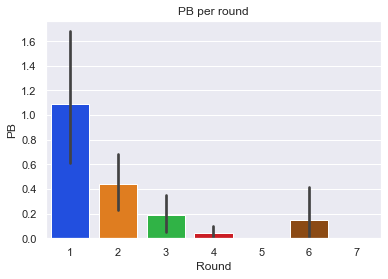

In [136]:
g = sns.barplot(x='Round', y='PB', data=wr_df, palette='bright')
g.set_title('PB per round')

### Number of Pro Bowls based on weight at combine and round drafted

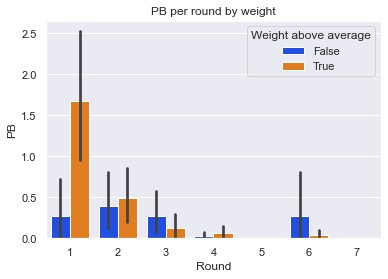

In [117]:
wr_df['Weight above average'] = wr_df['Wt'] > wr_df['Wt'].mean()

g = sns.barplot(x='Round', y='PB', hue='Weight above average', data=wr_df, palette='bright')
g.set_title('PB per round by weight')
plt.show()

### Number of Pro Bowls based on 40yd times at combine and round drafted

Text(0.5, 1.0, 'PB per round by average 40yd time')

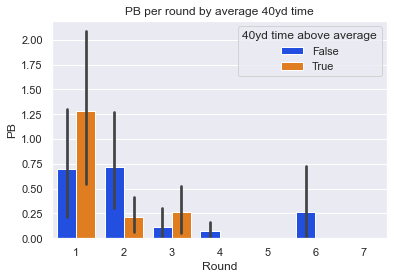

In [123]:
wr_df['40yd time above average'] = wr_df['40yd'] < wr_df['40yd'].mean()
g = sns.barplot(x='Round', y='PB', hue='40yd time above average', data=wr_df, palette='bright')
g.set_title('PB per round by average 40yd time')

### Number of Pro Bowls based on vertical height at combine and round drafted

Text(0.5, 1.0, 'PB per round by average Vertical')

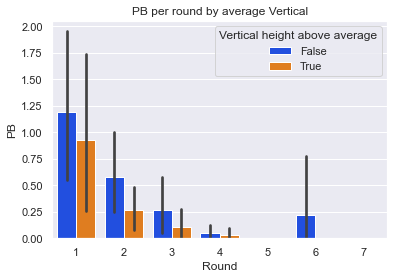

In [135]:
wr_df['Vertical height above average'] = wr_df['Vertical'] > wr_df['Vertical'].mean()
g = sns.barplot(x='Round', y='PB', hue='Vertical height above average', data=wr_df, palette='bright')
g.set_title('PB per round by average Vertical')

### Number of Pro Bowls based on number of college receiving touchdowns

Text(0.5, 1.0, 'PB by College Receiving TD')

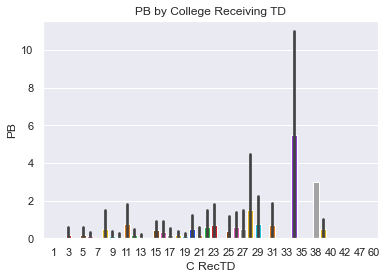

In [162]:
g = sns.barplot(x='C RecTD', y='PB', data=wr_df, palette='bright')
for label in g.get_xticklabels()[::2]:
     label.set_visible(False)
g.set_title('PB by College Receiving TD')

### Number of Pro Bowls based on amount of receiving yards in college

Text(0.5, 1.0, 'PB by College Scrimmage TD')

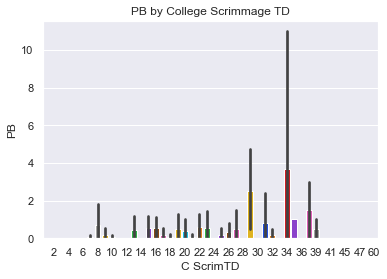

In [133]:
g = sns.barplot(x='C ScrimTD', y='PB', data=wr_df, palette='bright')
for label in g.get_xticklabels()[::2]:
     label.set_visible(False)
g.set_title('PB by College Scrimmage TD')

### Number of Pro Bowls based on number of college receiving touchdowns and average number of college scrimmage touchdowns

Text(0.5, 1.0, 'PB by College Receiving TD')

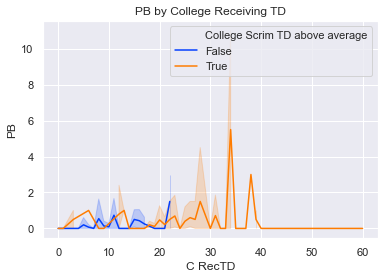

In [140]:
wr_df['College Scrim TD above average'] = wr_df['C ScrimTD'] > wr_df['C ScrimTD'].mean()
g = sns.lineplot(x='C RecTD', y='PB', hue='College Scrim TD above average', data=wr_df, palette='bright')
g.set_title('PB by College Receiving TD')

## Model
---

### WR
Naive Bayes Model

In [268]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [287]:
y = wr_df['PB'] > 0
features = ['Round', '40yd', 'Wt', 'Vertical', 'C ScrimTD', 'C RecTD']
X = wr_df[features].fillna(0)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [289]:
print(confusion_matrix(y_test, y_pred))
print("Confidence:",nb.score(X_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

[[67 17]
 [ 5  3]]
Confidence: 0.7608695652173914
Number of mislabeled points out of a total 92 points : 22
